In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import PIL as image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

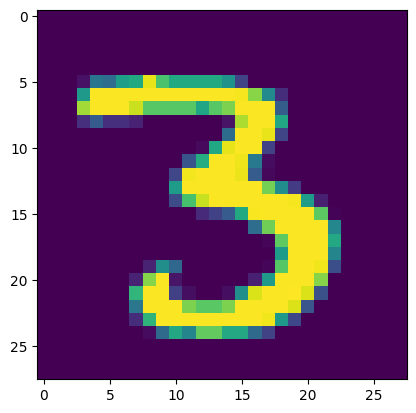

In [10]:
plt.imshow(X_train[12])
plt.show()

In [11]:
X_train = X_train/255
X_test = X_test/255

In [13]:
# Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 967us/step - loss: 0.3023 - accuracy: 0.9108
Epoch 2/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.1464 - accuracy: 0.9563
Epoch 3/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.1075 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.0868 - accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.0720 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 2s 955us/step - loss: 0.0615 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.0543 - accuracy: 0.9825
Epoch 8/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.0473 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.0412 - accuracy: 0.9866
Epoch 10/10
1875/1875 [==============================] - 2s 903u

In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(loss, accuracy)

313/313 [==============================] - 0s 719us/step - loss: 0.1088 - accuracy: 0.9724
0.10876324772834778 0.9724000096321106


In [18]:
Y_pred = model.predict(X_test)
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

313/313 [==============================] - 0s 565us/step
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 3, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 1, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 

In [19]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

Text(0.5, 47.7222222222222, 'Predicted Labels')

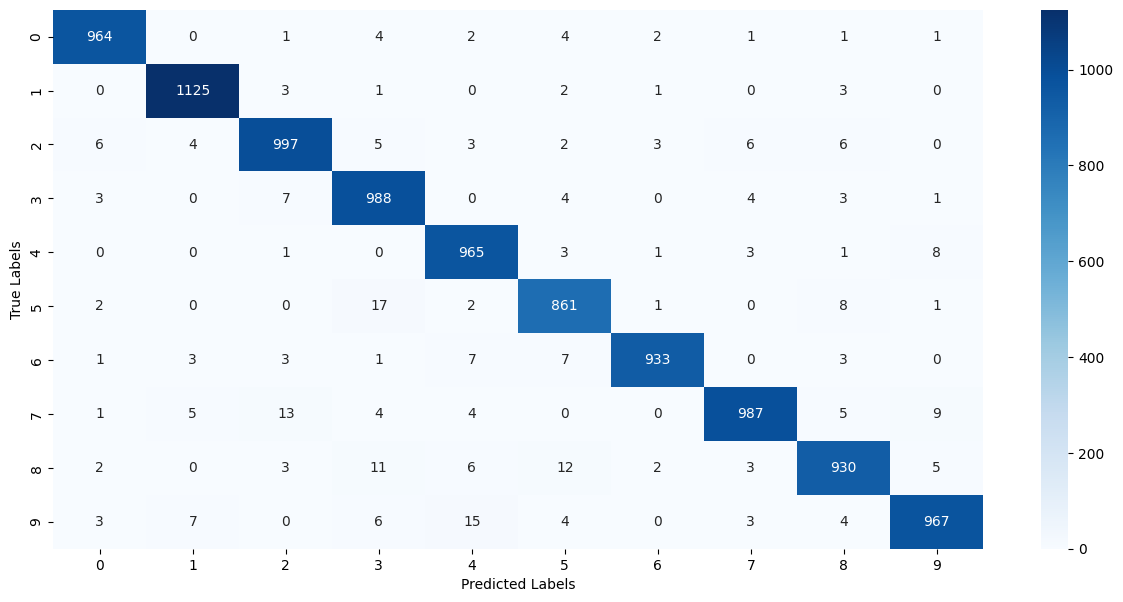

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [36]:
input_image_path = 'test_image.png'

input_image = cv2.imread(input_image_path)
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


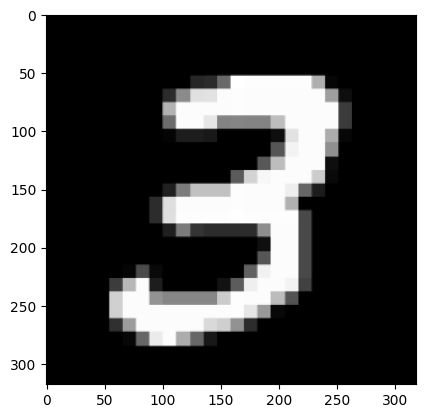

In [37]:
plt.imshow(input_image)

In [44]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
image_resize = cv2.resize(grayscale, (28,28))
image_resize = image_resize/255
image_reshaped = np.reshape(image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print("The image: ", input_pred_label)

1/1 [==============================] - 0s 18ms/step
The image:  3
